# Data Preprocessing & EDA

# Table of contents:
* [First glimpse](#first-bullet)
* [Encoding](#second-bullet)
* [Fixing data anomalies/outliners](#third-bullet)
* [Filling empty rows](#fourth-bullet)
* [Correlations and playing with features](#fifth-bullet)
* [Feature Importance using Random Forest](#sixth-bullet)
* [Separation of Test and Train data](#seventh-bullet)
* [Basic Models](#eigth-bullet)
 


 

 

# First glimpse <a class="anchor" id="first-bullet"></a>


## Import necessary libraries


In [1]:
# import necessary modules
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Load necessary data

In [2]:
# Load data 
# change path to your notebook home path
# Michał's path
path ='/Users/michael/Documents/GitHub'
#initialData = pd.read_csv(path+'/Home_Credit_Default_Risk_Project/Data/application_train.csv')

# Łukasz's path
initialData = pd.read_csv('../data/application_train.csv')

## How balanced is our data?


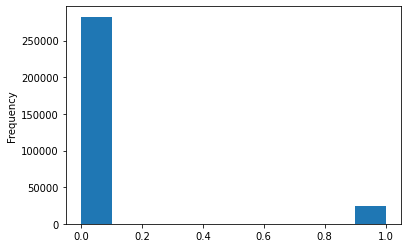

In [3]:
# this is obviously a imbalanced classfictation task
initialData['TARGET'].plot.hist();

In [4]:
print('Initial data rows and columns: ', initialData.shape)
initialData.head()


Initial data rows and columns:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Helper function that will show, which columns have missing values and how many of them is missing

In [5]:
# function that will return table with information about missing values 
def missing_values_table(df, print_info = False):
        # checking missing data
        total = df.isnull().sum().sort_values(ascending = False)
        percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
        mis_val_table_ren_columns  = pd.concat([total, percent], axis=1, keys=['Total number', '% of data'])
        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0]
        return mis_val_table_ren_columns

In [6]:
missing_values_table(initialData).head(50)

,Total number,% of data
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [7]:
missing_values_table(initialData).tail(14)

,Total number,% of data
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
NAME_TYPE_SUITE,1292,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021
EXT_SOURCE_2,660,0.214626


## What feature data types are in our dataframe?

In [8]:
initialData.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

## How many categories do object types have?

In [9]:
# info about categorical columns
for col in initialData: 
    if initialData[col].dtype == 'object':
        print("Column {:27s} has {:3d} unique categories(with NaN)".format(col,len(list(initialData[col].unique()))))

Column NAME_CONTRACT_TYPE          has   2 unique categories(with NaN)
Column CODE_GENDER                 has   3 unique categories(with NaN)
Column FLAG_OWN_CAR                has   2 unique categories(with NaN)
Column FLAG_OWN_REALTY             has   2 unique categories(with NaN)
Column NAME_TYPE_SUITE             has   8 unique categories(with NaN)
Column NAME_INCOME_TYPE            has   8 unique categories(with NaN)
Column NAME_EDUCATION_TYPE         has   5 unique categories(with NaN)
Column NAME_FAMILY_STATUS          has   6 unique categories(with NaN)
Column NAME_HOUSING_TYPE           has   6 unique categories(with NaN)
Column OCCUPATION_TYPE             has  19 unique categories(with NaN)
Column WEEKDAY_APPR_PROCESS_START  has   7 unique categories(with NaN)
Column ORGANIZATION_TYPE           has  58 unique categories(with NaN)
Column FONDKAPREMONT_MODE          has   5 unique categories(with NaN)
Column HOUSETYPE_MODE              has   4 unique categories(with NaN)
Column

# Important remark 
####  The following columns: NAME_CONTRACT_TYPE, FLAG_OWN_CAR and FLAG_OWN_REALTY would undergo label encoding. For intstance EMERGENCYSTATE_MODE was also considered but about 40% of data is missing. Hence we will go only with those 3.

# Encoding <a class="anchor" id="second-bullet"></a>


## Label encoding of selected columns

In [10]:
# Create list of columns
columns = ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
# Create a label encoder object
LabEnc= LabelEncoder()

# Iterate through the columns
for col in columns:
    # Train on the data
    LabEnc.fit(initialData[col])
    # Transform both training and testing data
    initialData[col] = LabEnc.transform(initialData[col])
    

In [11]:
initialData.shape

(307511, 122)

## One-hot encoding of rest categorical values

In [12]:
# one-hot encoding of categorical variables
initialData = pd.get_dummies(initialData)
print('New data rows and columns, after one-hot encoding: ', initialData.shape)

New data rows and columns, after one-hot encoding:  (307511, 243)


# Fixing data anomalies/outliners <a class="anchor" id="third-bullet"></a>

### - The difficult part here is to establish where real anomalies are just an error and where we have to "fix" them.
### - We are extra carefull with data cause it is real life data based on existing bank records

## Helper function that finds anomalies

In [13]:
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    # Set upper and lower limit to 3 standard deviation
    lower_limit  = np.mean(data) - 3*np.std(data)
    upper_limit = np.mean(data) + 3*np.std(data)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [14]:
missing_with_anomalies=[]
for col in initialData:
    if initialData[col].values.any():
        a=find_anomalies(initialData[col].unique())
        
        if len(a)!=0:
            missing_with_anomalies.append(col)

In [15]:
missing_with_anomalies


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION']

## AMT_INCOME_TOTAL

income of the client

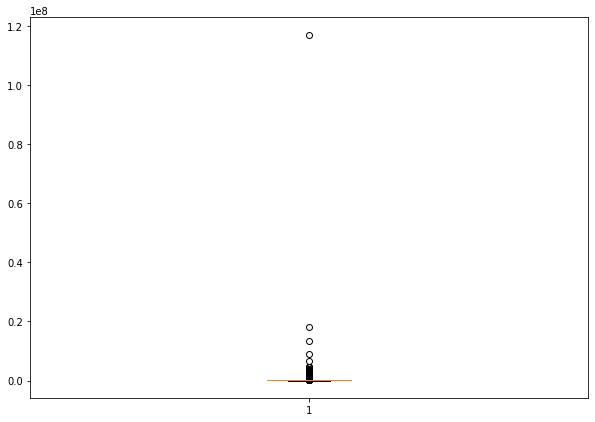

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [16]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(initialData["AMT_INCOME_TOTAL"]) 
  
# show plot 
plt.show() 
print(initialData['AMT_INCOME_TOTAL'].describe()) 

In [17]:
find_anomalies(initialData["AMT_INCOME_TOTAL"].unique()).count(1.170000e+08)

1

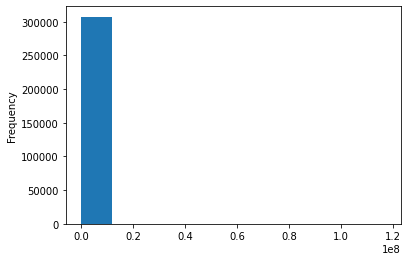

In [18]:
initialData['AMT_INCOME_TOTAL'].plot.hist();

### It is possible that one single person earns 117 million and still take credit. Hence, we not gonna delete this outlier

## AMT_CREDIT

credit amount of the loan

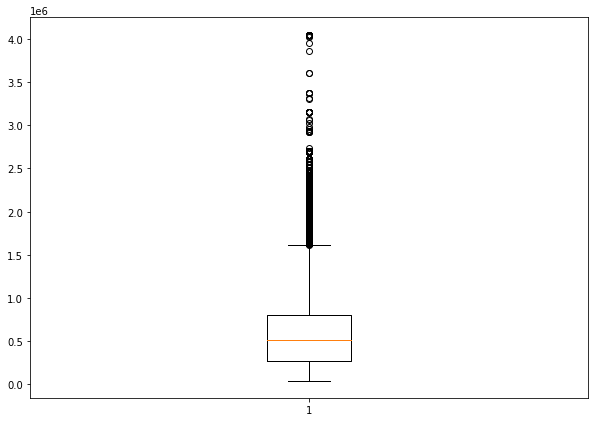

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


In [19]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(initialData["AMT_CREDIT"]) 
  
# show plot 
plt.show() 
print(initialData['AMT_CREDIT'].describe()) 

False


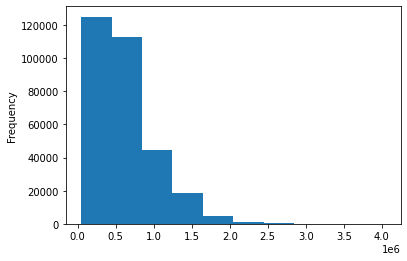

In [20]:
initialData['AMT_CREDIT'].plot.hist();
print(initialData['AMT_CREDIT'].isnull().values.any())

### Also here we are carefull with the data. Despite the fact that outliers do exist we decided no to delete them. 

## REGION_POPULATION_RELATIVE

Normalized population of region where client lives (higher number means the client lives in more populated region)

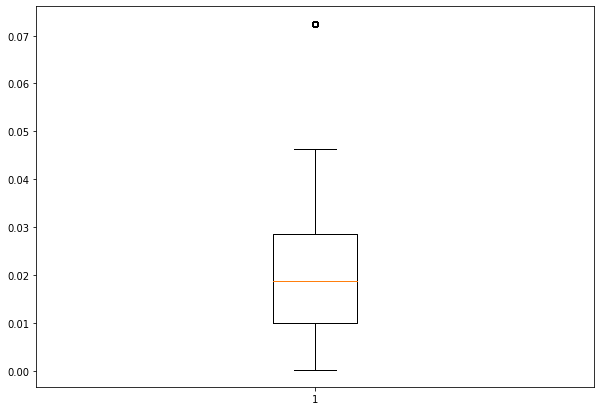

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


In [21]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(initialData["REGION_POPULATION_RELATIVE"]) 
  
# show plot 
plt.show() 
print(initialData['REGION_POPULATION_RELATIVE'].describe()) 

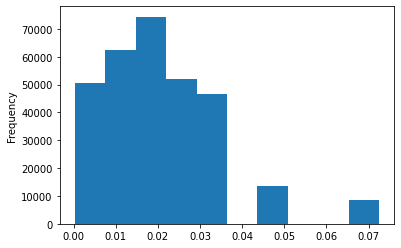

In [22]:
initialData['REGION_POPULATION_RELATIVE'].plot.hist();

In [23]:
anom = initialData[initialData['REGION_POPULATION_RELATIVE'] == 0.072508]
non_anom = initialData[initialData['REGION_POPULATION_RELATIVE'] != 0.072508]
print('The non-anomalies %0.2f%%' % (non_anom['REGION_POPULATION_RELATIVE'].mean()*100))
print('The anomalies %0.2f%%' % (anom['REGION_POPULATION_RELATIVE'].mean()*100))

The non-anomalies 1.94%
The anomalies 7.25%


In [24]:
print("anomalies number: %d" % find_anomalies(initialData["REGION_POPULATION_RELATIVE"]).count(0.072508))
print("anomalies %: ", find_anomalies(initialData["REGION_POPULATION_RELATIVE"]).count(0.072508)/307511*100)

anomalies number: 8412
anomalies %:  2.735511900387303


In [25]:
# initialData["REGION_POPULATION_RELATIVE"].replace({0.072508: np.nan},inplace =True)

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64
0


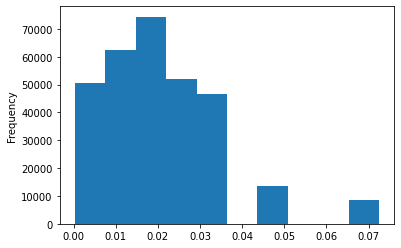

In [26]:
initialData['REGION_POPULATION_RELATIVE'].plot.hist();
print(initialData['REGION_POPULATION_RELATIVE'].describe()) 
print(initialData['REGION_POPULATION_RELATIVE'].isnull().sum())

## DAYS_REGISTRATION

How many days before the application did client change his registration

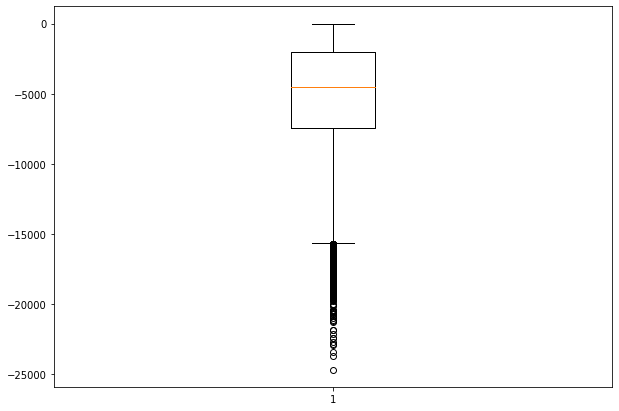

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


In [27]:
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(initialData["DAYS_REGISTRATION"]) 
  
# show plot 
plt.show()

print(initialData['DAYS_REGISTRATION'].describe()) 

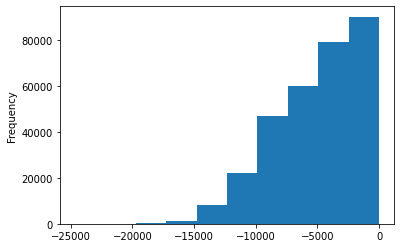

In [28]:
initialData['DAYS_REGISTRATION'].plot.hist();

## DAYS_EMPLOYED

How many days before the application the person started current employment

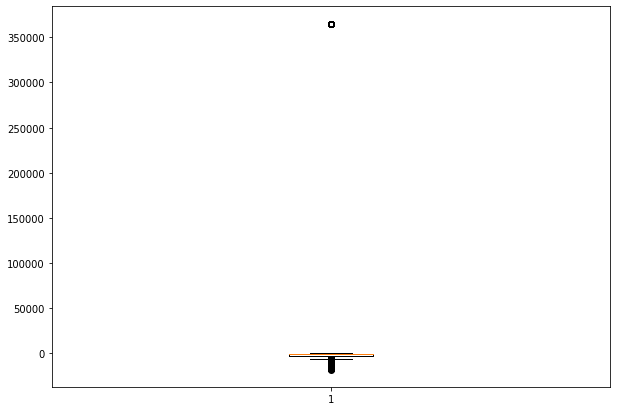

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


In [29]:
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(initialData["DAYS_EMPLOYED"]) 
  
# show plot 
plt.show() 


print(initialData['DAYS_EMPLOYED'].describe()) # 

In [30]:
print("how many years is max? ")
print(365243//365)


how many years is max? 
1000


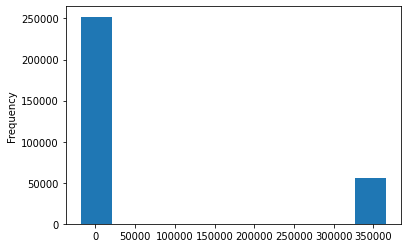

In [31]:
initialData['DAYS_EMPLOYED'].plot.hist();

In [32]:
anom = initialData[initialData['DAYS_EMPLOYED'] == 365243]
non_anom = initialData[initialData['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies %0.2f%%' % (non_anom['TARGET'].mean()*100))
print('The anomalies %0.2f%%' % (anom['TARGET'].mean()*100))
print("anomalies number: %d" % find_anomalies(initialData["DAYS_EMPLOYED"]).count(365243))
print("anomalies %: ", find_anomalies(initialData["DAYS_EMPLOYED"]).count(365243)/307511*100)

The non-anomalies 8.66%
The anomalies 5.40%
anomalies number: 0
anomalies %:  0.0


In [33]:
# Replace the outliers with nan
initialData["DAYS_EMPLOYED"].replace({365243: np.nan},inplace =True)


In [34]:
# Changing negative Values to positive
initialData['DAYS_BIRTH'] = abs(initialData['DAYS_BIRTH'])
initialData['DAYS_EMPLOYED'] = abs(initialData['DAYS_EMPLOYED'])
initialData['DAYS_REGISTRATION'] = abs(initialData['DAYS_REGISTRATION'])
initialData['DAYS_ID_PUBLISH'] = abs(initialData['DAYS_ID_PUBLISH'])

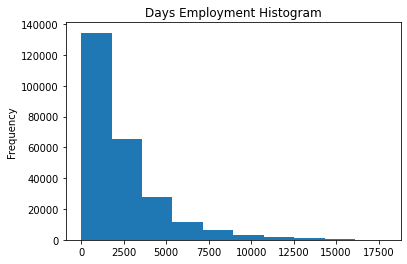

In [35]:
initialData['DAYS_EMPLOYED'].plot.hist(title="Days Employment Histogram");
plt.show();

# Filling empty rows <a class="anchor" id="fourth-bullet"></a>

In [36]:
# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'median')
copy_of_data = initialData.copy()
copy_of_data=pd.DataFrame(imputer.fit_transform(copy_of_data))
copy_of_data.columns=initialData.columns
copy_of_data.index=initialData.index
copy_of_data = copy_of_data.astype(initialData.dtypes)
copy_of_data.isna().values.any()

False

# Correlations and playing with features <a class="anchor" id="fifth-bullet"></a>

In [37]:
# Using pearson find correlations with the target and sort from highest to lowest
initialData_correlations = initialData.corr(method="pearson")['TARGET'].sort_values()
# Display correlations
print('      TOP 10 Positive Correlations:\n', initialData_correlations.iloc[::-1].head(10))
print('\n         TOP 10 Negative Correlations:\n', initialData_correlations.head(10))


      TOP 10 Positive Correlations:
 TARGET                                               1.000000
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
Name: TARGET, dtype: float64

         TOP 10 Negative Correlations:
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
DAYS_BIRTH                             -0.078239
DAYS_EMPLOYED                          -0.074958
NAME_EDUCATION_TYPE_Higher e

### After finding correlations we decided to focused on 5 features:
 - DAYS_BIRTH, we will use age(DAYS_BIRTH/365)
 - DAYS_EMPLOYED, we will use years(DAYS_EMPLOYED/365)
 - EXT_SOURCE_3, EXT_SOURCE_2 and EXT_SOURCE_1 
 
 EXT_SOURCE probably means external source. There is almost nothing about them in description(quote:"Normalized score from external data source"). Probably, they are some kind of credit score. Hence, they will be extremaly useful.

 
 Of course, relation between DAYS_BIRTH and DAYS_EMPLOYED is negative when we change negative number of days for positive.

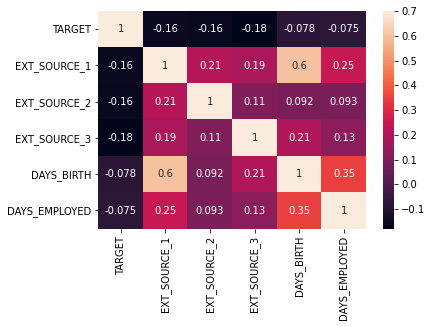

In [38]:
ext_data = initialData[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED']]
ext_data_corrs = ext_data.corr(method="pearson")

ax = sns.heatmap(ext_data_corrs, vmax=0.7,annot = True) 


# Separation of Test and Train data <a class="anchor" id="seventh-bullet"></a>

In [39]:
from sklearn.model_selection import train_test_split
# split into train test sets
train, test = train_test_split(copy_of_data,test_size=0.2)

test.reset_index(inplace = True, drop = True)
train.reset_index(inplace = True, drop = True)

In [40]:
train.shape

(246008, 243)

In [41]:
test.shape
test

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,411923,0,0,0,1,0,135000.0,292500.0,12523.5,292500.0,...,0,0,0,0,0,0,0,0,0,0
1,164493,0,0,0,0,0,157500.0,781920.0,39924.0,675000.0,...,0,0,0,0,0,0,0,0,0,0
2,267317,0,0,0,0,1,67500.0,450000.0,21109.5,450000.0,...,0,0,0,0,0,1,0,0,1,0
3,214255,0,0,0,0,0,180000.0,876816.0,44896.5,720000.0,...,0,0,0,0,0,0,0,0,0,0
4,299846,0,0,1,1,0,225000.0,481495.5,36130.5,454500.0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,185913,0,0,0,0,0,202500.0,808650.0,23643.0,675000.0,...,0,0,0,0,0,0,0,0,0,0
61499,449539,0,0,1,0,0,135000.0,225000.0,23053.5,225000.0,...,0,0,0,0,0,0,1,0,1,0
61500,157746,0,0,0,1,1,90000.0,229230.0,13288.5,202500.0,...,0,0,0,0,0,0,0,1,1,0
61501,121961,0,0,0,1,1,121500.0,528633.0,27121.5,472500.0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
train.to_csv("./train.csv")

In [43]:
test.to_csv("./test.csv")

## Logistic Regression

In [44]:
train_copy = train.copy()


In [45]:
train=train.drop(columns="TARGET")
train_columns=train.columns

In [46]:
train

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,254343,0,0,1,0,135000.0,900000.0,26316.0,900000.0,0.018029,...,0,0,0,0,0,0,0,0,0,0
1,243348,0,0,1,0,135000.0,269550.0,14751.0,225000.0,0.025164,...,0,0,0,0,0,0,1,0,1,0
2,369760,0,1,0,0,112500.0,1078200.0,34780.5,900000.0,0.046220,...,0,0,0,0,0,0,0,0,0,0
3,218906,0,0,1,2,90000.0,650758.5,34668.0,603000.0,0.018850,...,0,0,0,0,0,0,0,0,0,0
4,284201,0,1,1,1,112500.0,1067940.0,31356.0,765000.0,0.005002,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246003,234487,0,1,0,0,225000.0,1695483.0,46624.5,1327500.0,0.008230,...,0,0,0,0,0,0,0,0,0,0
246004,278629,0,0,1,0,78750.0,225000.0,12694.5,225000.0,0.020713,...,0,0,0,0,0,1,0,0,1,0
246005,357294,0,0,0,0,94500.0,679500.0,26572.5,679500.0,0.020246,...,0,0,0,0,0,0,0,0,0,0
246006,324660,0,0,0,1,119700.0,180000.0,5652.0,180000.0,0.010147,...,0,0,0,0,0,1,0,0,1,0


In [47]:
train_columns = train_copy["TARGET"]
len(train_columns)

246008

In [48]:
len(train)

246008

In [49]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)
# Train on the training data
log_reg.fit(train, train_columns)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.0001)

In [50]:
test_copy = test.copy()
test=test.drop(columns="TARGET")
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,411923,0,0,1,0,135000.0,292500.0,12523.5,292500.0,0.028663,...,0,0,0,0,0,0,0,0,0,0
1,164493,0,0,0,0,157500.0,781920.0,39924.0,675000.0,0.046220,...,0,0,0,0,0,0,0,0,0,0
2,267317,0,0,0,1,67500.0,450000.0,21109.5,450000.0,0.026392,...,0,0,0,0,0,1,0,0,1,0
3,214255,0,0,0,0,180000.0,876816.0,44896.5,720000.0,0.018029,...,0,0,0,0,0,0,0,0,0,0
4,299846,0,1,1,0,225000.0,481495.5,36130.5,454500.0,0.046220,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61498,185913,0,0,0,0,202500.0,808650.0,23643.0,675000.0,0.030755,...,0,0,0,0,0,0,0,0,0,0
61499,449539,0,1,0,0,135000.0,225000.0,23053.5,225000.0,0.026392,...,0,0,0,0,0,0,1,0,1,0
61500,157746,0,0,1,1,90000.0,229230.0,13288.5,202500.0,0.031329,...,0,0,0,0,0,0,0,1,1,0
61501,121961,0,0,1,1,121500.0,528633.0,27121.5,472500.0,0.031329,...,0,0,0,0,0,0,1,0,1,0


In [51]:
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [52]:
from sklearn.metrics import roc_auc_score
print('Train/Test split results:')
#print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(Y_test, Y_pred))
print("ROC",  roc_auc_score(test_copy["TARGET"], log_reg_pred))

Train/Test split results:
ROC 0.6282668422572285


In [53]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    
    # Extract the labels for training
    labels = features['TARGET']
    test_labels = test_features['TARGET']
    # Remove the ids and target
    features = features.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR','TARGET'])
    
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], 
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
submission, fi, metrics = model(train, test)
print('Baseline metrics')
print(metrics)

In [ ]:
test
